## CCTV와 인구수

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus']=False

### CCTV와 관련된 정보 불러오기

In [22]:
cctv = pd.read_csv('CCTV_in_Seoul.csv')
cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 서울시 인구수 관련 정보 불러오기

In [23]:
pop = pd.read_excel('population_in_Seoul.xls',
                   header = 2, # 3번째부터 시작하겠다
                    usecols = 'B,D,G,J,N',
                   )
pop.columns = ['기관명','인구 총합','내국인 총합','외국인총합','65세 이상']
pop = pop.dropna()
pop.head()

,기관명,인구 총합,내국인 총합,외국인총합,65세 이상
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


#### CCTV 증가율 확인해보기

In [24]:
cctv['증가율'] = ( cctv['2014년']+cctv['2015년']+cctv['2016년'] ) / cctv['2013년도 이전']
cctv = cctv[['기관명','소계','증가율']]
cctv.head()

,기관명,소계,증가율
0,강남구,2780,1.506192
1,강동구,773,1.664908
2,강북구,748,1.252033
3,강서구,884,1.347938
4,관악구,1496,1.492908


In [25]:
cctv.rename(columns={'소계':'cctv총수'},inplace=True)
cctv

,기관명,cctv총수,증가율
0,강남구,2780,1.506192
1,강동구,773,1.664908
2,강북구,748,1.252033
3,강서구,884,1.347938
4,관악구,1496,1.492908
5,광진구,707,0.532286
6,구로구,1561,0.649737
7,금천구,1015,1.000000
8,노원구,1265,1.889299
9,도봉구,485,2.466387


### CCTV와 인구수 데이터 병합하기

In [26]:
df = pd.merge(cctv,pop,on='기관명')
df

,기관명,cctv총수,증가율,인구 총합,내국인 총합,외국인총합,65세 이상
0,강남구,2780,1.506192,570500.0,565550.0,4950.0,63167.0
1,강동구,773,1.664908,453233.0,449019.0,4214.0,54622.0
2,강북구,748,1.252033,330192.0,326686.0,3506.0,54813.0
3,강서구,884,1.347938,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,1.492908,525515.0,507203.0,18312.0,68082.0
5,광진구,707,0.532286,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,0.649737,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,1.000000,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,1.889299,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,2.466387,348646.0,346629.0,2017.0,51312.0


In [28]:
df.set_index('기관명',inplace=True)
df

,cctv총수,증가율,인구 총합,내국인 총합,외국인총합,65세 이상
기관명,,,,,,
강남구,2780,1.506192,570500.0,565550.0,4950.0,63167.0
강동구,773,1.664908,453233.0,449019.0,4214.0,54622.0
강북구,748,1.252033,330192.0,326686.0,3506.0,54813.0
강서구,884,1.347938,603772.0,597248.0,6524.0,72548.0
관악구,1496,1.492908,525515.0,507203.0,18312.0,68082.0
광진구,707,0.532286,372164.0,357211.0,14953.0,42214.0
구로구,1561,0.649737,447874.0,416487.0,31387.0,56833.0
금천구,1015,1.000000,255082.0,236353.0,18729.0,32970.0
노원구,1265,1.889299,569384.0,565565.0,3819.0,71941.0


### 연습문제

> Q1. cctv가 가장 많은 순서로 정렬하시오

In [30]:
df['cctv총수'].sort_values(ascending=False)

기관명
강남구     2780
양천구     2034
서초구     1930
은평구     1873
용산구     1624
구로구     1561
관악구     1496
성북구     1464
동대문구    1294
노원구     1265
동작구     1091
성동구     1062
금천구     1015
종로구     1002
서대문구     962
영등포구     904
강서구      884
강동구      773
강북구      748
광진구      707
중구       671
중랑구      660
송파구      618
마포구      574
도봉구      485
Name: cctv총수, dtype: int64

> Q2. 기관별 cctv 총수를 bar chart(수평)으로 표시하시오

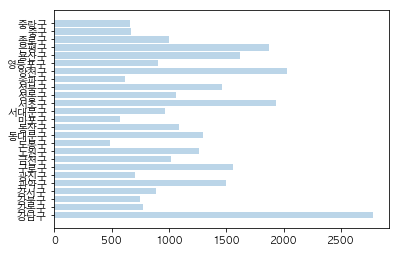

In [44]:
df2 = df['cctv총수']
plt.barh(df.index,df2,alpha=0.3)
plt.show()

> Q3. 기관별 cctv 증가율을 bar chart(수평)으로 표시하시오

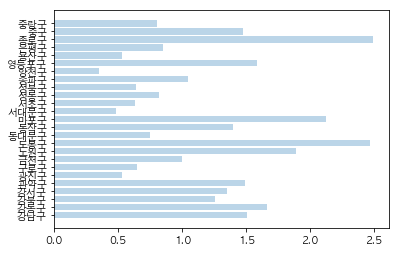

In [43]:
df3 = df['증가율']
plt.barh(df.index,df3,alpha=0.3)
plt.show()

> Q4. 구별 외국인 비율과 고령자 비율 column을 추가히시오

In [39]:
df['외국인 비율'] = df['외국인총합'] / df['인구 총합']
df['고령자 비율'] = df['65세 이상'] / df['인구 총합']
df

,cctv총수,증가율,인구 총합,내국인 총합,외국인총합,65세 이상,외국인 비율,고령자 비율
기관명,,,,,,,,
강남구,2780,1.506192,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
강동구,773,1.664908,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
강북구,748,1.252033,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
강서구,884,1.347938,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
관악구,1496,1.492908,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553
광진구,707,0.532286,372164.0,357211.0,14953.0,42214.0,0.040179,0.113428
구로구,1561,0.649737,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895
금천구,1015,1.000000,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253
노원구,1265,1.889299,569384.0,565565.0,3819.0,71941.0,0.006707,0.126349


> Q5. 기관별 인구 대비 cctv 총수에 cctv비율 column을 추가하시오

In [40]:
df['cctv 비율'] = df['cctv총수']/df['인구 총합']
df

,cctv총수,증가율,인구 총합,내국인 총합,외국인총합,65세 이상,외국인 비율,고령자 비율,cctv 비율
기관명,,,,,,,,,
강남구,2780,1.506192,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722,0.004873
강동구,773,1.664908,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516,0.001706
강북구,748,1.252033,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003,0.002265
강서구,884,1.347938,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158,0.001464
관악구,1496,1.492908,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553,0.002847
광진구,707,0.532286,372164.0,357211.0,14953.0,42214.0,0.040179,0.113428,0.001900
구로구,1561,0.649737,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895,0.003485
금천구,1015,1.000000,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253,0.003979
노원구,1265,1.889299,569384.0,565565.0,3819.0,71941.0,0.006707,0.126349,0.002222


> Q6. 기관별 cctv 비율을 bar chart(수평)으로 표시하시오

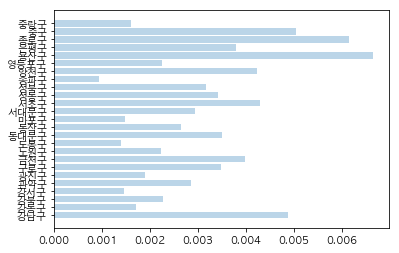

In [50]:
df6 = df['cctv 비율']
plt.barh(df.index,df6,alpha=0.3)
plt.show()